In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import datasets, linear_model
from scipy import stats
#27.01

In [15]:
data = pd.read_csv("salary.csv", sep=',')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [16]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [17]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None


In [19]:
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    
    n = len(points)
    
    for i in range(n):
        x = points.iloc[i].YearsExperience
        y = points.iloc[i].Salary
        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))
        
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b

m = 0
b = 0                                    
L = 0.001
epochs = 300

for i in range (epochs):
    m, b = gradient_descent(m, b, data, L)

print(m, b)
                        
        

12569.148667412612 4772.831286045466


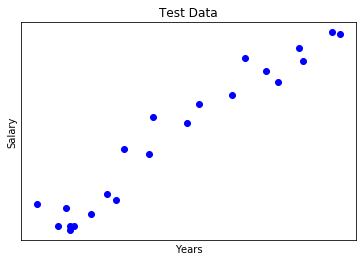

In [20]:
x = data['YearsExperience']
y = data['Salary']

x = x.values.reshape(len(x),1)
y = y.values.reshape(len(y),1)

# Split the data into training/testing sets
x_train = x[:-22]
x_test = x[-22:]

# Split the targets into training/testing sets
y_train = y[:-22]
y_test = y[-22:]

plt.scatter(x_test, y_test,  color='blue')
plt.title('Test Data')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.xticks(())
plt.yticks(())

plt.show()


#### Another 3rd method

In [23]:
x = data['YearsExperience'].values.reshape(-1,1)
y = data['Salary'].values.reshape(-1,1)
# Split the data for train and test 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
# Fitting the model
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

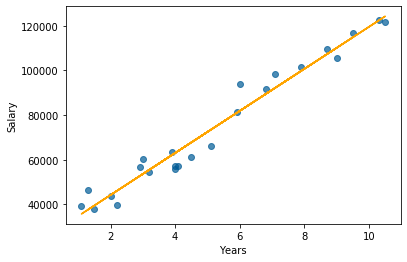

In [24]:
plt.scatter(x_train, y_train, color = '#005b96', alpha= 0.7)
plt.plot(x_train, lr.predict(x_train), color = "orange")
plt.xlabel('Years')
plt.ylabel('Salary')
plt.show()